
<img src="http://hydrology.usu.edu/images/taudem5logo.gif" style="float:left;width:300px;padding:20px">       


# TauDEM Raster Processing Notebook

<br>
This notebook demonstrates basic watershed processing using the TauDEM GIS library.  For more information about TauDEM, see http://hydrology.usu.edu/taudem/taudem5/.  This tutorial is divided into the following three categories:

* [Setup and Preparation](#setup)
* [GIS Processing using TauDEM](#gis)
* [New Resource Creation using HydroShare](#creation)


### 1. Script Setup and Preparation
<a name="setup"></a>

Before we begin GIS processing, we must import several libaries into the notebook.  The **hs_utils** library provides functions for interacting with HydroShare, including resource querying, dowloading and creation.  The **taudem** libary provides functions for simplifying the TauDEM GIS commands, workspace maintenance, as well as visualization. Finally, the `%matplotlib inline` command tells the notebook server to place plots and figures directly into the notebook. 

**Note:** You may see some matplotlib warnings if this is the first time you are running this notebook.  These warnings can be ignored.


In [1]:
# import required libaries for geoprocessing
import os
import subprocess
import taudem
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [2]:
import os
np=os.cpu_count()
np

10

---


##  Raster Processing
<a name="gis"></a>

The following operations demonstrate how TauDEM can be used to perform basic raster processes. See the following link for more information on TauDEM:  
http://hydrology.usu.edu/taudem/taudem5/TauDEM53CommandLineGuide.pdf

### 1. View the Raw DEM

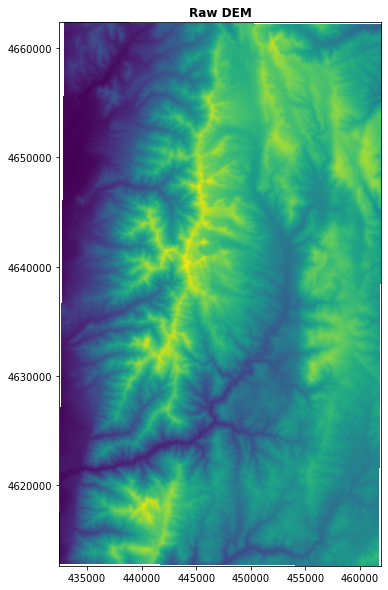

In [3]:
dataset = rasterio.open('logan.tif')
fig, ax = plt.subplots(figsize=(10,10))
show((dataset), ax=ax, cmap='viridis', title='Raw DEM')

### 2. Remove DEM Pits

In [4]:
help(taudem.pitremove)

Help on function pitremove in module taudem:

pitremove(np, input, output)
    command: pitremove -z dem.tif -fel demfel.tif, demfile: input elevation grid, felfile: output elevations with pits filled



In [5]:
cmd = taudem.pitremove(np, os.getcwd()+'/logan.tif', 'demfel.tif')
taudem.taudem_execute(cmd)

PitRemove version 5.3.9
Input file /home/jovyan/work/taudem/logan.tif has projected coordinate system.
Nodata value input to create partition from file: -340282346638528859811704183484516925440.000000
Nodata value recast to float used in partition raster: -340282346638528859811704183484516925440.000000
Processes: 10
Header read time: 0.044567
Data read time: 0.001615
Compute time: 0.800204
Write time: 1.359053
Total time: 2.205438



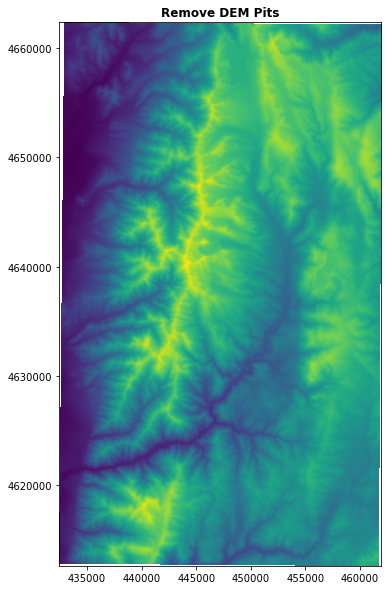

In [6]:
dataset = rasterio.open('demfel.tif')
fig, ax = plt.subplots(figsize=(10,10))
show((dataset), ax=ax, cmap='viridis', title='Remove DEM Pits')

### 3. Calculate Flow Directions

In [7]:
help(taudem.d8flowdir)

Help on function d8flowdir in module taudem:

d8flowdir(np, input, output1, output2)
    command: d8flowdir -fel demfel.tif -p demp.tif -sd8 demsd8.tif, demfile: Pit filled elevation input data, pointfile: D8 flow directions output, slopefile: D8 slopes output



In [8]:
cmd = taudem.d8flowdir(np, os.getcwd()+'/demfel.tif', 'demp.tif', 'demsd8.tif')
taudem.taudem_execute(cmd)

D8FlowDir version 5.3.9
Input file /home/jovyan/work/taudem/demfel.tif has projected coordinate system.
Nodata value input to create partition from file: -300000000549775575777803994281145270272.000000
Nodata value recast to float used in partition raster: -300000000549775575777803994281145270272.000000
Processors: 10
Header read time: 0.081823
Data read time: 0.045904
Compute Slope time: 0.376632
Write Slope time: 1.699322
Resolve Flat time: 2.890092
Write Flat time: 0.579140
Total time: 5.672914



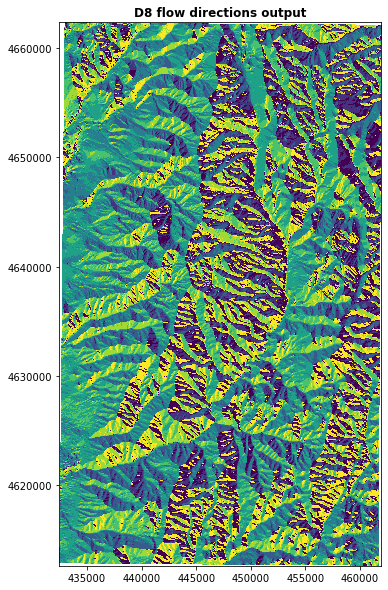

In [9]:
dataset = rasterio.open('demp.tif')
fig, ax = plt.subplots(1,1, figsize=(10,10))
show((dataset), ax=ax, cmap='viridis', title="D8 flow directions output")

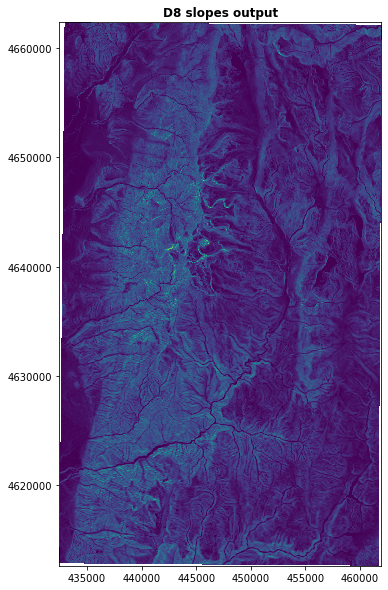

In [10]:
dataset = rasterio.open('demsd8.tif')
fig, ax = plt.subplots(figsize=(10,10))
show((dataset), ax=ax, cmap='viridis', title="D8 slopes output")

In [11]:
help(taudem.dinfflowdir)

Help on function dinfflowdir in module taudem:

dinfflowdir(np, input, output1, output2)
    command: dinfflowdir -fel demfel.tif -ang demang.tif -slp demslp.tif, demfile: Pit filled elevation input data, angfile: Dinf flow directions output, slopefile: Dinf slopes output



In [12]:
cmd = taudem.dinfflowdir(np, os.getcwd()+'/demfel.tif', 'demang.tif', 'demslp.tif')
taudem.taudem_execute(cmd)

DinfFlowDir version 5.3.9
Input file /home/jovyan/work/taudem/demfel.tif has projected coordinate system.
Nodata value input to create partition from file: -300000000549775575777803994281145270272.000000
Nodata value recast to float used in partition raster: -300000000549775575777803994281145270272.000000
Processors: 10
Header read time: 0.061830
Data read time: 0.094037
Compute Slope time: 1.104429
Write Slope time: 1.677651
Resolve Flat time: 2.227070
Write Flat time: 1.294125
Total time: 6.459144



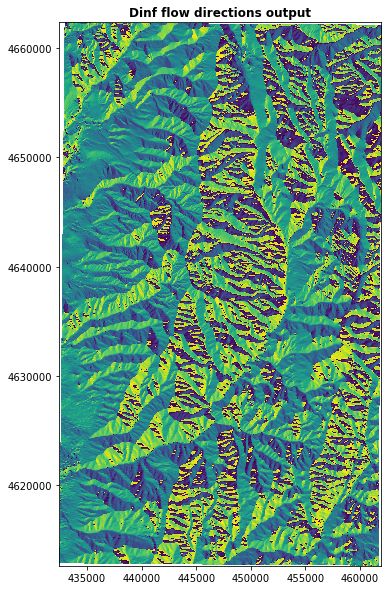

In [13]:
dataset = rasterio.open('demang.tif')
fig, ax = plt.subplots(1,1, figsize=(10,10))
show((dataset), ax=ax, cmap='viridis', title="Dinf flow directions output")

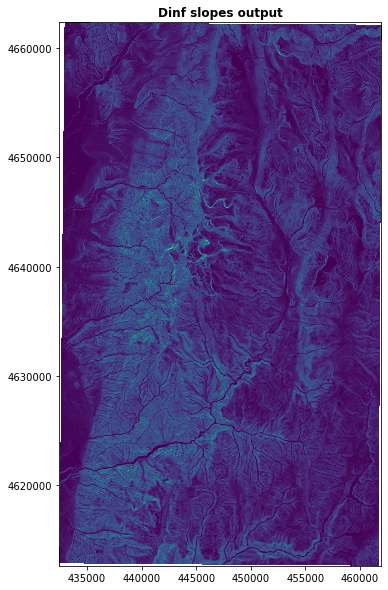

In [14]:
dataset = rasterio.open('demslp.tif')
fig, ax = plt.subplots(figsize=(10,10))
show((dataset), ax=ax, cmap='viridis', title="Dinf slopes output")

### 4. Calculate Contributing Area

In [15]:
help(taudem.aread8)

Help on function aread8 in module taudem:

aread8(np, input, output)
    command: aread8 -p demp.tif -ad8 demad8.tif [-o outletfile.shp] [-wg demwg.tif] [-nc], pfile: input flow directions grid, ad8file: output contributing area grid, Outletfile: input outlets shapefile, wgfile: input weight grid file



In [16]:
cmd = taudem.aread8(np, os.getcwd()+'/demp.tif', 'demad8.tif')
taudem.taudem_execute(cmd)

AreaD8 version 5.3.9
Input file /home/jovyan/work/taudem/demp.tif has projected coordinate system.
Nodata value input to create partition from file: -32768.000000
Nodata value recast to int16_t used in partition raster: -32768
Number of Processes: 10
Read time: 0.091968
Compute time: 0.599865
Write time: 0.475983
Total time: 1.167816



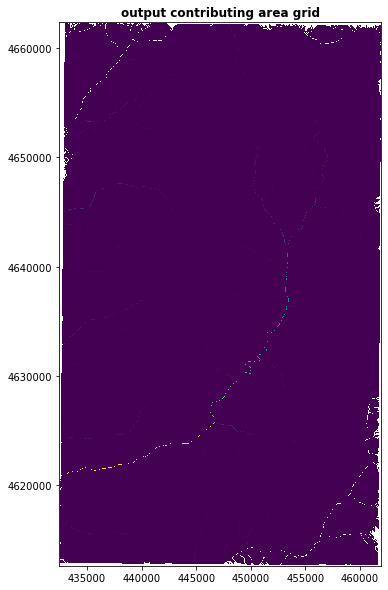

In [17]:
dataset = rasterio.open('demad8.tif')
fig, ax = plt.subplots(1,1, figsize=(10,10))
show((dataset), ax=ax, cmap='viridis', title="output contributing area grid")

In [18]:
help(taudem.areadinf)

Help on function areadinf in module taudem:

areadinf(np, input, output)
    command: areadinf -ang demang.tif -sca demsca.tif [-o outletfile.shp] [-wg demwg.tif] [-nc], angfile: Dinf angles input file, scafile: Dinf contributing areas output file, outletfile: Shapefile with outlet coordinates, wgfile: an optional weight file for area computations



In [19]:
cmd = taudem.aread8(np, os.getcwd()+'/demang.tif', 'demsca.tif')
taudem.taudem_execute(cmd)

AreaD8 version 5.3.9
Input file /home/jovyan/work/taudem/demang.tif has projected coordinate system.
Nodata value input to create partition from file: -340282346638528859811704183484516925440.000000
Nodata value recast to int16_t used in partition raster: 0
Number of Processes: 10
Read time: 0.017021
Compute time: 0.590173
Write time: 0.328579
Total time: 0.935773



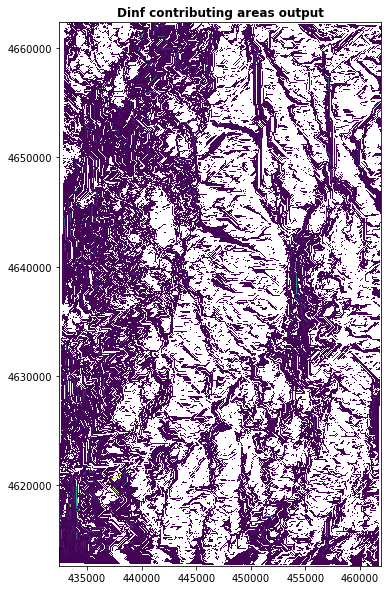

In [20]:
dataset = rasterio.open('demsca.tif')
fig, ax = plt.subplots(figsize=(10,10))
show((dataset), ax=ax, cmap='viridis', title="Dinf contributing areas output")